In [3]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
neural_dat=np.array(hf['CellResp'])
del hf

In [5]:
regressors=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')
cell_pos=regressors['data']['CellXYZ'][0][0]
missing_values=regressors['data']['IX_inval_anat'][0][0]
cell_pos=np.delete(cell_pos,missing_values,axis=0)

In [31]:
energy=np.sum(np.abs(neural_dat)**2,axis=0)

In [30]:
print(energy)

[23.282099 24.711779 28.608229 ... 26.389277 46.71779  30.399399]


(array([8.2653e+04, 3.9000e+02, 1.0600e+02, 3.3000e+01, 1.3000e+01,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.0026989e+00, 2.5395239e+03, 5.0740449e+03, 7.6085664e+03,
        1.0143088e+04, 1.2677608e+04, 1.5212130e+04, 1.7746650e+04,
        2.0281172e+04, 2.2815693e+04, 2.5350215e+04], dtype=float32),
 <a list of 10 Patch objects>)

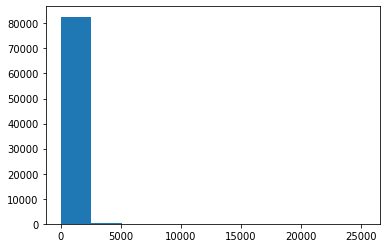

In [9]:
plt.hist(energy)


In [19]:
energy.shape

(83205,)

(0, 200)

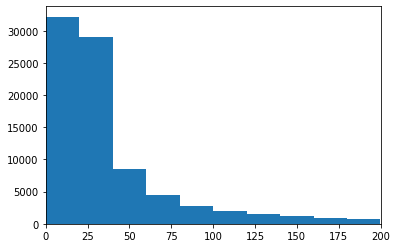

In [33]:
#Remove 
energy[energy>200]=0
plt.hist(energy.flatten())
plt.xlim(0,200)

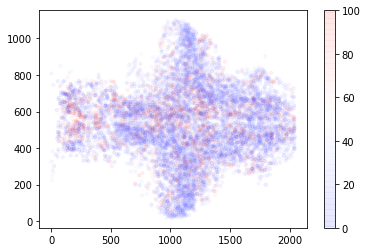

In [43]:
np.seed=7
random_neurons=np.random.choice(neural_dat.shape[1],10000,replace=False)
neural_dat_=neural_dat[:,random_neurons]
cell_pos_=cell_pos[random_neurons,:]
energy_=energy[random_neurons]

sc = plt.scatter(cell_pos_[:,0], cell_pos_[:,1], c=energy_,vmax=100,alpha=0.05,s=10,cmap='bwr')
plt.colorbar(sc)
plt.show()